
# 🧪 Laboratorio: Implemetacion de Regresión Lineal con Offset
---
## Actividad 1
## 🔧 Instrucciones
Basandose en el código de la unidad anterior:

1. Genere unos datos sinteticos que le permitan suponer la siguiente hipotesis de compotamiento de los datos:

$$h(x) = w_0 + w_1 x$$

   Donde $w_0$ y $w_1$ son parámetros reales que definen la relación lineal.

2. Defina valores arbitrarios para $w_0$ y $w_1$, por ejemplo $w_0 = 2$ y $w_1 = 3$.
3. Genere el conjunto de etiquetas $y$ usando la hipótesis y agregando un **ruido gaussiano** (media cero y desviación estándar, por ejemplo, de 1).

3. Visualización
   - Grafique los datos generados como puntos de dispersión.
   - Grafique la línea original sin ruido, es decir, la función $h(x) = w_0 + w_1 x$ como línea base.

4. Ajuste del modelo
   - Deduzca las ecuaciones de regresión lineal por medio de las ecuaciones normales y obtenga un ajuste a la línea a los datos con ruido.
   - Compare visualmente esta nueva línea con la línea real $h(x)$.

---

### 📌 Preguntas para reflexionar

- ¿Cuál es el efecto del ruido gaussiano sobre los datos? ¿Cómo cambia la visualización?
- ¿Qué pasa si se cambia la desviación estándar del ruido?
- ¿Podría un modelo lineal aprender adecuadamente la relación entre $x$ y $y$? ¿Por qué?

----
# ⚡ **SOLUCIÓN 1**


### 1.

In [173]:
import time
import numpy as np
import matplotlib.pyplot as plt
#Una semilla para generar los mismos
np.random.seed(42)




###2.

In [174]:

n_puntos=5000
pendiente=3   #omega = 3
ds=1 #Desviacion estandar de 1
desplazamiento=2 #omega_0 = 2

###3.

In [175]:
def genera_datos(n,w,w_0,ds):
  x=np.linspace(0,10,n)
  y=w*x+w_0+np.random.normal(0,ds,n) #Introducimos el nuevo w_0 (desplazamiento en y)...Además añadimos ruido gaussiano con media 0
  return x,y


###4.


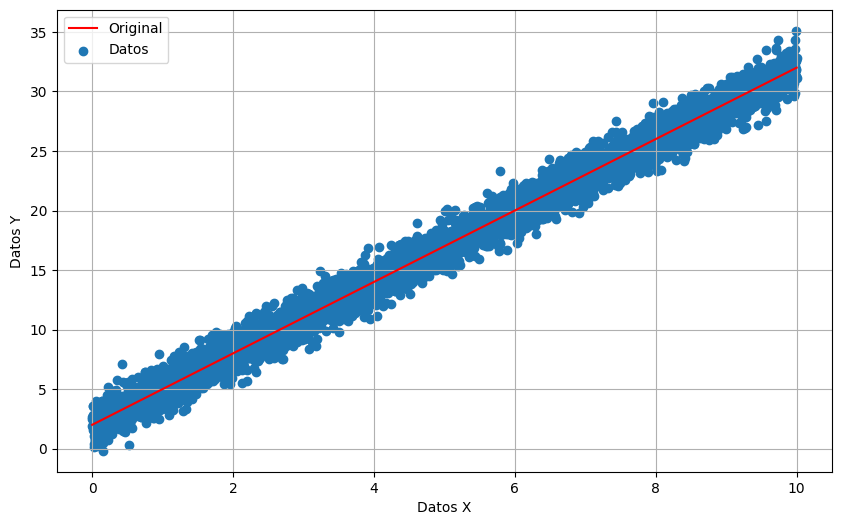

In [176]:
x,y=genera_datos(n_puntos,pendiente,desplazamiento,ds)
h=pendiente*x+desplazamiento

plt.figure(figsize=(10, 6))
plt.plot(x,h,label="Original",color="red")
plt.scatter(x,y, label="Datos")
plt.xlabel("Datos X")
plt.ylabel("Datos Y")
plt.legend()
plt.grid(True)
plt.show()

###5.
# 1. Error para una sola muestra

Primero, definimos el error para un **solo punto de datos**. El error es la diferencia entre el valor real de la variable dependiente $ y^{(i)} $ y el valor predicho por nuestro modelo $ h(x^{(i)})$.

El error es:

 $Error^{(i)} = y^{(i)} - h(x^{(i)}) $

Sustituyendo nuestra función de hipótesis $h(x) = w_0 + w_1 x $:

$
Error^{(i)} = y^{(i)} - \left( w_0 + w_1 x^{(i)} \right)
$

---

# 2. Error Cuadrático para una sola muestra

Para asegurar que los errores positivos y negativos no se cancelen entre sí, y para penalizar los errores grandes más que los pequeños, elevamos el error al cuadrado.

$
Error\ Cuadrático^{(i)} = \left( y^{(i)} - h(x^{(i)}) \right)^2
$

---

# 3. Función de Costo (Error Cuadrático Medio - MSE)

La función de costo es el **promedio de los errores cuadrados** de todas las muestras en nuestro conjunto de datos. El objetivo es encontrar los valores de \( w_0 \) y \( w_1 \) que minimicen este promedio.
Si tenemos \( m \) muestras en nuestro conjunto de datos (donde \( i \) va de 1 a \( m \)), la función de costo \( J(w_0, w_1) \) se define como:

$
J(w_0, w_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - h(x^{(i)}) \right)^2
$

---

### Aquí:

- $(\tfrac{1}{2m})$: Es el factor de promediado. El factor $(\tfrac{1}{2})$ se añade por convención para simplificar la derivada al momento de optimizar el modelo (ya que el 2 del exponente se cancela con este 2).
- $(\sum_{i=1}^m)$: El símbolo de sumatoria, que indica que estamos sumando los errores cuadráticos de todas las \( m \) muestras.
- $\left( y^{(i)} - h(x^{(i)}) \right)^2$: El error cuadrático para cada muestra individual.

---

En resumen, la función de costo **MSE** mide qué tan bien se ajusta nuestra línea de predicción a los datos.  
Un valor de \( J(w_0, w_1) \) cercano a cero indica un ajuste excelente.

El objetivo de la regresión lineal es encontrar los valores óptimos de \( w_0 \) y \( w_1 \) que **minimicen** esta función \( J \).


---

## 3. Derivadas parciales

Calculamos las derivadas parciales de \(J\) respecto a \(w_0\) y \(w_1\).

**Derivada respecto a \(w_0\):**

$
\begin{aligned}
\frac{\partial J}{\partial w_0}
&= \frac{1}{2m}\sum_{i=1}^m 2\bigl(y^{(i)} - w_0 - w_1 x^{(i)}\bigr)\cdot(-1) \\
&= -\frac{1}{m}\sum_{i=1}^m \bigl(y^{(i)} - w_0 - w_1 x^{(i)}\bigr).
\end{aligned}
$

Igualando a cero (condición de mínimo):
$
\sum_{i=1}^m \bigl(y^{(i)} - w_0 - w_1 x^{(i)}\bigr) = 0.
$

Reordenando:

$
\sum_{i=1}^m y^{(i)} = m w_0 + w_1 \sum_{i=1}^m x^{(i)}.
\tag{1}
$

Dividiendo por \(m\) y usando $\bar{x}=\tfrac{1}{m}\sum x^{(i)},\ \bar{y}=\tfrac{1}{m}\sum y^{(i)}$:

$
w_0 + w_1 \bar{x} = \bar{y} \quad\Rightarrow\quad w_0 = \bar{y} - w_1 \bar{x}.
\tag{A}
$

---

**Derivada respecto a \(w_1\):**

\
\begin{aligned}
\frac{\partial J}{\partial w_1}
&= \frac{1}{2m}\sum_{i=1}^m 2\bigl(y^{(i)} - w_0 - w_1 x^{(i)}\bigr)\cdot(-x^{(i)}) \\
&= -\frac{1}{m}\sum_{i=1}^m x^{(i)}\bigl(y^{(i)} - w_0 - w_1 x^{(i)}\bigr).
\end{aligned}
\

Igualando a cero:

$
\sum_{i=1}^m x^{(i)} y^{(i)} = w_0 \sum_{i=1}^m x^{(i)} + w_1 \sum_{i=1}^m (x^{(i)})^2.
\tag{2}
$

---

## 4. Resolver el sistema (obtener \(w_1\) y \(w_0\))

Sustituimos (A) $w_0 = \bar{y} - w_1 \bar{x}$ en la ecuación (2):

$
\sum_{i=1}^m x^{(i)} y^{(i)} = (\bar{y} - w_1 \bar{x})\sum_{i=1}^m x^{(i)} + w_1 \sum_{i=1}^m (x^{(i)})^2 .
$

Como $\sum_{i=1}^m x^{(i)} = m\bar{x}$, se obtiene:

$
\sum_{i=1}^m x^{(i)} y^{(i)} = m\bar{x}\,\bar{y} - w_1 m \bar{x}^2 + w_1 \sum_{i=1}^m (x^{(i)})^2 .
$

Reagrupando los términos con \(w_1\):

$
\sum_{i=1}^m x^{(i)} y^{(i)} - m\bar{x}\,\bar{y} = w_1\Bigl(\sum_{i=1}^m (x^{(i)})^2 - m\bar{x}^2\Bigr).
$

Por tanto,

$
w_1 = \frac{\displaystyle \sum_{i=1}^m x^{(i)} y^{(i)} - m\bar{x}\,\bar{y}}
{\displaystyle \sum_{i=1}^m (x^{(i)})^2 - m\bar{x}^2 } .
\tag{B}
$

---

## 5. Forma centrada (covarianza/varianza)

Usando identidades de sumas se puede reescribir (B) como

$
w_1 = \frac{\displaystyle \sum_{i=1}^m \bigl(x^{(i)}-\bar{x}\bigr)\bigl(y^{(i)}-\bar{y}\bigr)}
{\displaystyle \sum_{i=1}^m \bigl(x^{(i)}-\bar{x}\bigr)^2 } .
$

Esta expresión muestra que \(w_1\) es la razón entre la **covarianza muestral** y la **varianza muestral** de \(x\).

Una vez obtenido \(w_1\), el intercepto se obtiene por:

$
w_0 = \bar{y} - w_1 \bar{x}.
\tag{C}
$

---

## 6. Resumen final (fórmulas cerradas)

$
\boxed{\,w_1 = \dfrac{\sum_{i=1}^m (x^{(i)}-\bar{x})(y^{(i)}-\bar{y})}{\sum_{i=1}^m (x^{(i)}-\bar{x})^2}\,}
\qquad,\qquad
\boxed{\,w_0 = \bar{y} - w_1 \bar{x}\,}
$

---

### Nota (forma matricial)
Si se escribe el problema en forma matricial con $X = \begin{pmatrix}1 & x^{(1)}\\ \vdots & \vdots \\ 1 & x^{(m)}\end{pmatrix}$ y $\theta=\begin{pmatrix}w_0\\w_1\end{pmatrix}$, la solución general es

$
\theta = (X^\top X)^{-1} X^\top y,
$

siempre que $X^\top X$ sea invertible.

---


In [177]:
inicio=time.time()
omega=(np.sum((x-np.mean(x))*(y-np.mean(y))))/(np.sum((x-np.mean(x))**2))
omega_0=np.mean(y)-omega*np.mean(x)
print(f"El valor de omega es: {omega}")
print(f"El valor de omega_0 es: {omega_0}")
fin=time.time()
print(f"Tiempo de ejecución: {fin-inicio}")

El valor de omega es: 2.9901721015532186
El valor de omega_0 es: 2.0547414223214826
Tiempo de ejecución: 0.005214214324951172


El error en la pendiente es de : -0.009827898446781447  El error en el desplazamiento es : 0.0547414223214826


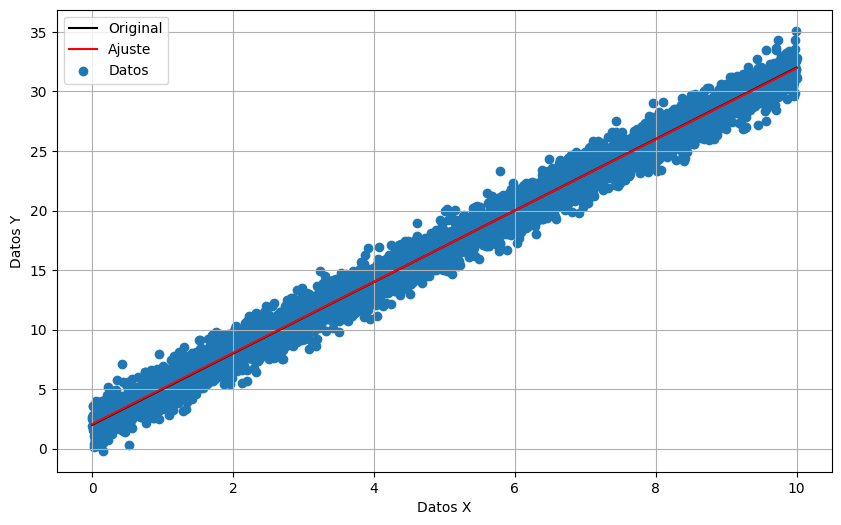

In [178]:
plt.figure(figsize=(10, 6))
plt.plot(x,h,label="Original",color="black")
plt.plot(x,omega*x+omega_0,label="Ajuste",color="red")
plt.scatter(x,y, label="Datos")
plt.xlabel("Datos X")
print(f"El error en la pendiente es de : {omega-pendiente}",f" El error en el desplazamiento es : {omega_0-desplazamiento}")
plt.ylabel("Datos Y")
plt.legend()
plt.grid(True)

### 📌 Preguntas para reflexionar

- ¿Cuál es el efecto del ruido gaussiano sobre los datos? ¿Cómo cambia la visualización?\
El ruido gaussiano genera valores pseudo aleatorios sobre el conjunto de datos creando una "nube" de datos al rededor de los datos originales.
- ¿Qué pasa si se cambia la desviación estándar del ruido?\
Si se cambia la desviación estandar los datos del ruido van a alejarse más de los datos originales.
- ¿Podría un modelo lineal aprender adecuadamente la relación entre $x$ y $y$? ¿Por qué?\
Depende de que relación tengan las variables *x* y *y*, como acabamos de observar si obedecen un comportamiento lineal si es posible acercarse a los datos originales con un modelo, aunque siempre existirá un error aunque sea mínimo.

## Actividad 2
## 🔧 Instrucciones

- Leer el fichero de datos “DatosRegresion1D.xlsx”.
- Considere la hipótesis (el modelo) de que los puntos se ajustan a una recta que pasa por el origen, de acuerdo con la expresión
$$ℎ(𝑥)=𝑤𝑥$$
- Dibuje un gráfico con los 100 primeros puntos y la hipótesis $𝑤=0.1$.
- Considere la función de coste cuadrática.
- Dibuje la función de coste resultante para valores $𝑤 ∈ [0,0.3]$.
- Dibuje e imprima el valor de $𝑤$ que minimiza el coste.
- El valor óptimo de $𝑤$ puede también calcularse mediante la ecuación normal definida con anterioridad.
- Imprima el valor óptimo obtenido y compárelo con el obtenido con la ecuación normal.
- Dibuje de nuevo los primeros 100 puntos, la hipótesis $𝑤=0.1$ y la hipótesis óptima.
- Dibuje la curva de aprendizaje correspondiente a la generalización del modelo anterior. Para ello:
 - Utilice un número de clientes para entrenar el modelo en el rango $𝑛_{𝑡𝑟𝑎𝑖𝑛} ∈ [10,200]$.
 - Utilice un número de clientes de prueba $𝑛_{𝑡𝑒𝑠𝑡}=𝑛−𝑛_{𝑡𝑟𝑎𝑖𝑛}$, siendo 𝑛=1000 el número total de clientes en el archivo.

In [179]:
import pandas as pd

df = pd.read_excel("/Datos.xlsx")

# 2. Mostrar las primeras filas para verificar qué columnas hay
print(df.head())




    ingresos    consumo
0  44.617090   9.720475
1  73.430827  12.340257
2   5.010866   1.535624
3  33.721594   7.879812
4  18.941810   4.721109


In [180]:
df.shape

(1000, 2)

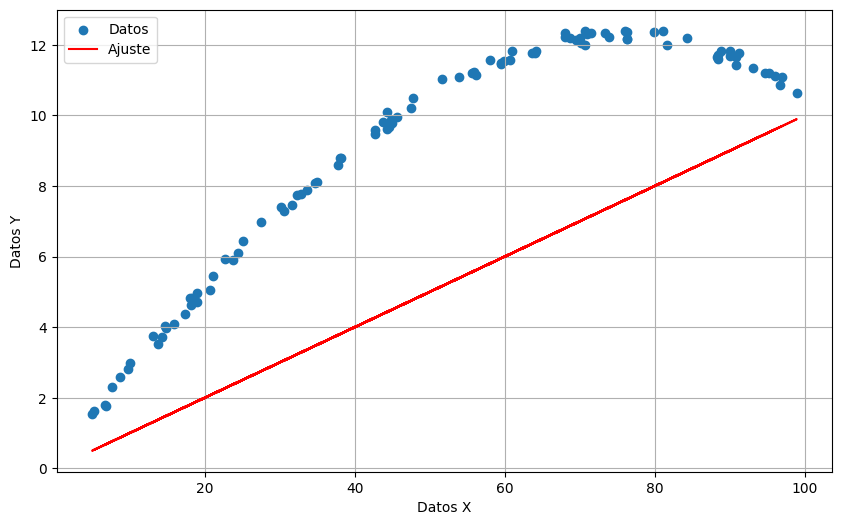

In [181]:
p=df["ingresos"]
d=df["consumo"]
w=0.1
h=w*p

plt.figure(figsize=(10, 6))
plt.scatter(p [0:100] ,d[0:100], label="Datos")
plt.plot(p[0:100],h[0:100],label="Ajuste",color="red")
plt.xlabel("Datos X")
plt.ylabel("Datos Y")
plt.legend()
plt.grid(True)
plt.show()


Considere la función de coste cuadrática.

In [182]:
def funcion_costo(p, d):
    omega1 = np.linspace(0, 0.3, 100)
    J = []  # Lista para almacenar el valor de costo para cada omega1

    for w in omega1:
        h = w * p
        error = np.mean((h - d)**2)
        J.append(error)

    return omega1, np.array(J)

In [183]:
omega1_vals, J_vals = funcion_costo(p, d)

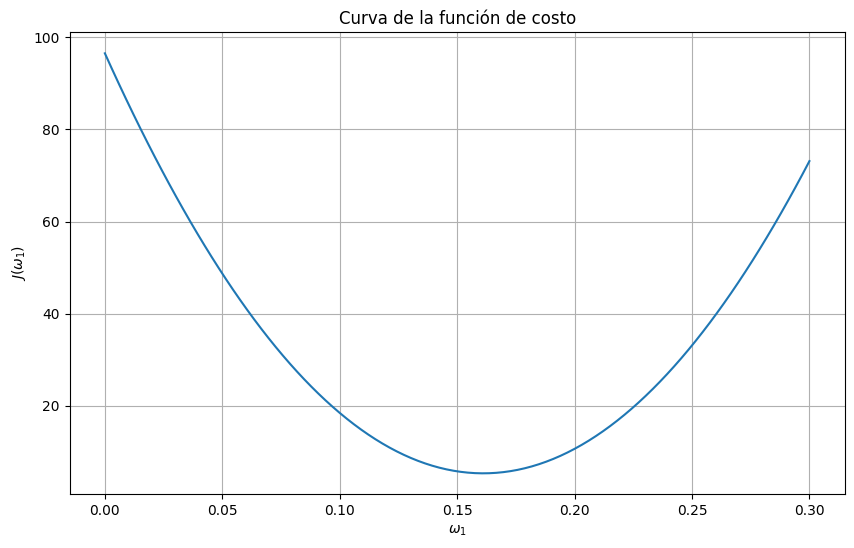

In [184]:
# Graficar la función de costo
plt.figure(figsize=(10, 6))
plt.plot(omega1_vals, J_vals)
plt.xlabel(r'$\omega_1$')
plt.ylabel(r'$J(\omega_1)$')
plt.title('Curva de la función de costo')
plt.grid(True)
plt.show()


Dibuje e imprima el valor de  w  que minimiza el coste.

In [185]:
min=omega1_vals[np.argmin(J_vals)]
print(min)

0.1606060606060606


Imprima el valor óptimo obtenido y compárelo con el obtenido con la ecuación normal.

In [186]:
omega=(sum(p*d)/sum(p*p))
print(f"El valor obtenido con la ecuacion normal es: {omega}",f"Comparacion entre valores: {omega-min}")

El valor obtenido con la ecuacion normal es: 0.16109992719558616 Comparacion entre valores: 0.000493866589525549


Dibuje de nuevo los primeros 100 puntos, la hipótesis  w=0.1  y la hipótesis óptima.

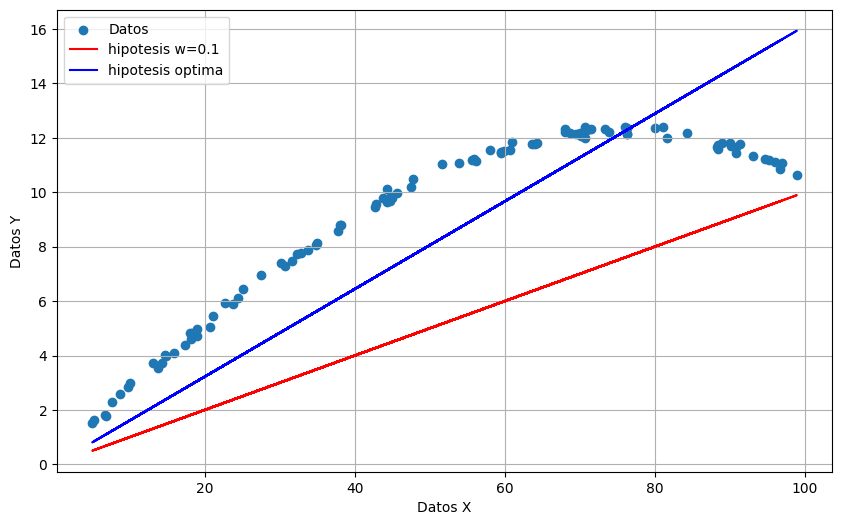

In [187]:
j=omega*p

plt.figure(figsize=(10, 6))
plt.scatter(p [0:100] ,d[0:100], label="Datos")
plt.plot(p[0:100],h[0:100],label="hipotesis w=0.1",color="red")
plt.plot(p[0:100],j[0:100],label="hipotesis optima",color="blue")
plt.xlabel("Datos X")
plt.ylabel("Datos Y")
plt.legend()
plt.grid(True)
plt.show()


Dibuje la curva de aprendizaje correspondiente a la generalización del modelo anterior. Para ello:
Utilice un número de clientes para entrenar el modelo en el rango  ntrain∈[10,200] .
Utilice un número de clientes de prueba  ntest=n−ntrain , siendo 𝑛=1000 el número total de clientes en el archivo.

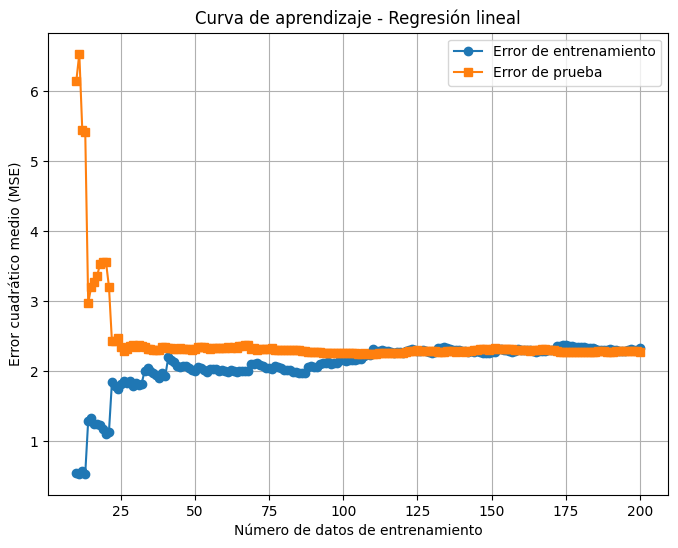

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

p=df[["ingresos"]]
n = len(d)

train_sizes = range(10, 201, 1)

train_errors = []
test_errors = []

for ntrain in train_sizes:
    ntest = n - ntrain

    # División en entrenamiento y prueba
    p_train, p_test = p[:ntrain], p[ntrain:]
    d_train, d_test = d[:ntrain], d[ntrain:]

    # Modelo lineal
    model = LinearRegression()
    model.fit(p_train, d_train)

    # Predicciones
    d_train_pred = model.predict(p_train)
    d_test_pred = model.predict(p_test)

    # Errores
    train_errors.append(mean_squared_error(d_train, d_train_pred))
    test_errors.append(mean_squared_error(d_test, d_test_pred))


plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_errors, label="Error de entrenamiento", marker="o")
plt.plot(train_sizes, test_errors, label="Error de prueba", marker="s")
plt.xlabel("Número de datos de entrenamiento")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Curva de aprendizaje - Regresión lineal")
plt.legend()
plt.grid(True)
plt.show()
